<a href="https://colab.research.google.com/github/arizonaCameraLab/interferometricFocalPlanes/blob/main/Transfer_Functions_of_intensity_measurements_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Mutual Coherence Transfer Functions
## David Brady
## University of Arizona
## April 2025
### generating using Google Genesis



# Analysis of Imaging System Transfer Functions

This document summarizes the derivation and visualization of transfer functions for a specific imaging system model, using a modified definition for the underlying mutual intensity transfer function.

## System Model

The system measures projections of the mutual intensity $J$. The measurement process is described by:

$g(y) = \text{diag}(H J H')$

Where:

1.  **$J$ (Mutual Intensity Matrix):** This matrix contains information about the spatial coherence of the light field at different positions and separations. It's defined as:
\begin{equation}
J = \begin{pmatrix} J(y,0) & J(y+d/2, d) \\ J(y+d/2, d) & J(y+d, 0) \end{pmatrix}
\end{equation}
The core component, $J(y,d)$, represents the mutual intensity between points separated by $d$ around a central position $y$. It relates to the original source distribution $f(x)$ via a linear shift-invariant transform involving the system's impulse response $h(x)$:
\begin{equation}
J(y,d) = \int f(x) h(y-x-d/2)h^*(y-x+d/2) \, dx
\end{equation}
Let $F(u)$ be the Fourier Transform of the source $f(x)$, and $\tilde{J}(u,d)$ be the Fourier Transform of the mutual intensity $J(y,d)$ with respect to $y$. The relationship is $\tilde{J}(u,d) = H_{source \to J}(u,d) F(u)$. For this analysis, we use the **modified** transfer function (phase term dropped from the original user specification):
\begin{equation}
H_{source \to J}(u,d) = (1 - |u|) \text{sinc}( d (1-|u|)) \quad \text{for } |u|<1, \text{ and } 0 \text{ otherwise.}
\end{equation}
Note that this implies $H_{source \to J}(u,0) = (1-|u|)$ for $|u|<1$.

2.  **$H$ (Unitary Transformation Matrix):** This matrix represents a transformation applied to the mutual intensity components, parameterized by angles $\theta$ and $\psi$:
\begin{equation}
H = \begin{pmatrix} \cos \theta & e^{i \psi} \sin \theta \\ -e^{-i \psi} \sin \theta & \cos \theta \end{pmatrix}
\end{equation}
$H'$ is the Hermitian conjugate (conjugate transpose) of $H$.

3.  **$g(y)$ (Measurement Vector):** This is the final output of the system, consisting of the diagonal elements of the transformed matrix $HJH'$. It has two channels:
\begin{equation}
g(y) = \begin{pmatrix} g_1(y) \\ g_2(y) \end{pmatrix}
\end{equation}

## Goal: System Transfer Functions

The objective is to understand how the overall system modifies the spatial frequency content of the original source $f(x)$ to produce the measurements $g_1(y)$ and $g_2(y)$. We derive the system transfer functions $T_1(u)$ and $T_2(u)$ such that:

$G_1(u) = \mathcal{F}\{g_1(y)\}(u) = T_1(u) F(u)$
$G_2(u) = \mathcal{F}\{g_2(y)\}(u) = T_2(u) F(u)$

Taking into account the spatial shifts ($y+d/2, y+d$) in the $J$ matrix (which introduce phase factors $e^{i \pi u d}$ and $e^{i 2\pi u d}$ in the Fourier domain) and using the modified $H_{source \to J}(u,d)$, the derived expressions for $|u|<1$ are:
\begin{equation}
T_1(u) = (1 - |u|) \left[ \cos^2 \theta + e^{i \pi u d} \text{sinc}(d(1-|u|)) \cos \psi \sin(2\theta) + e^{i 2\pi u d} \sin^2 \theta \right]
\end{equation}
\begin{equation}
T_2(u) = (1 - |u|) \left[ \sin^2 \theta - e^{i \pi u d} \text{sinc}(d(1-|u|)) \cos \psi \sin(2\theta) + e^{i 2\pi u d} \cos^2 \theta \right]
\end{equation}

## Python Code Functionality (`transfer_function_plotter_v3`)

The provided Python code (`plot_transfer_functions` function) visualizes the behavior of these transfer functions based on the **modified model**. Specifically, it:

1.  **Calculates Transfer Functions:** Computes the complex values of $T_1(u)$ and $T_2(u)$ based on the formulas above for a given set of parameters ($\theta$, $\psi$, $d$) over a range of spatial frequencies $u$.
2.  **Normalization:**
    * Calculates $T_1(0)$ and $T_2(0)$.
    * Normalizes $T_1(u)$ and $T_2(u)$ individually by dividing by their respective values at $u=0$, yielding $T_{1,\text{norm}}(u) = T_1(u)/T_1(0)$ and $T_{2,\text{norm}}(u) = T_2(u)/T_2(0)$.
    * Calculates the sum of the *unnormalized* transfer functions: $S(u) = T_1(u) + T_2(u)$.
    * Normalizes this sum by its value at $u=0$: $S_{\text{norm}}(u) = S(u) / S(0)$. (Note: $S(0)=2$).
3.  **Plotting:** Generates a plot for the spatial frequency range $u \in [0, 1]$ showing the magnitudes of:
    * Normalized $T_1$: $|T_{1,\text{norm}}(u)|$
    * Normalized $T_2$: $|T_{2,\text{norm}}(u)|$
    * Normalized Sum: $|S_{\text{norm}}(u)|$
    * The reference function $1-|u|$ (which equals $1-u$ for $u \ge 0$).
4.  **Parameterization:** Allows the user to easily change the input parameters `theta_deg`, `psi_deg`, and `d` to observe their effect on the transfer functions.

This visualization helps in understanding how the system's response to different spatial frequencies varies with the chosen configuration ($\theta, \psi, d$) under the assumptions of the modified model.


In [62]:

import numpy as np
import matplotlib.pyplot as plt

def calculate_modified_transfer_functions(u, theta, psi, d):
    """
    Calculates unnormalized complex transfer functions T1(u), T2(u)
    based on H(u,d)=(1-|u|)sinc(d(1-|u|)), their values at u=0 (T1_0, T2_0),
    their normalized versions, their sum S(u)=T1+T2, and S(0).

    Args:
        u (np.ndarray): Array of spatial frequencies.
        theta (float): Angle theta in radians.
        psi (float): Angle psi in radians.
        d (float): Shift parameter d.

    Returns:
        tuple: (T1, T2, T1_norm, T2_norm, S, S_norm, T1_0, T2_0, S_0).
               Returns None for normalized values if normalization fails.
    """
    # Ensure u is a numpy array
    u = np.asarray(u)

    # Initialize outputs with zeros (complex dtype)
    T1 = np.zeros_like(u, dtype=complex)
    T2 = np.zeros_like(u, dtype=complex)
    T1_norm = np.zeros_like(u, dtype=complex)
    T2_norm = np.zeros_like(u, dtype=complex)
    S = np.zeros_like(u, dtype=complex)
    S_norm = np.zeros_like(u, dtype=complex)


    # --- Calculate terms needed for T1 and T2 ---
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos2_theta = cos_theta**2
    sin2_theta = sin_theta**2
    sin_2theta = np.sin(2 * theta)
    cos_psi = np.cos(psi)

    # --- Calculate values at u=0 (for normalization) ---
    # H(0,d) = (1-0)sinc(d(1-0)) = sinc(d)
    # H(0,0) = (1-0)sinc(0) = 1
    # T1(0) = H(0,0)cos^2 + e^0*H(0,d)*cos(psi)sin(2theta) + e^0*H(0,0)sin^2
    # T1(0) = 1*cos^2 + 1*sinc(d)*cos(psi)sin(2theta) + 1*sin^2
    # T1(0) = 1 + sinc(d)*cos(psi)*sin(2theta)
    sinc_d = np.sinc(d) # numpy.sinc(x) = sin(pi*x)/(pi*x)
    T1_0 = 1.0 + sinc_d * cos_psi * sin_2theta
    # T2(0) = H(0,0)sin^2 - e^0*H(0,d)*cos(psi)sin(2theta) + e^0*H(0,0)cos^2
    # T2(0) = 1*sin^2 - 1*sinc(d)*cos(psi)sin(2theta) + 1*cos^2
    # T2(0) = 1 - sinc(d)*cos(psi)*sin(2theta)
    T2_0 = 1.0 - sinc_d * cos_psi * sin_2theta

    # Calculate S(0) = T1(0) + T2(0)
    S_0 = np.abs(T1_0) + np.abs(T2_0) # Should be 2.0

    # --- Define the mask for the valid range 0 <= u < 1 ---
    valid_mask = (u >= 0) & (u < 1)
    u_valid = u[valid_mask] # Use only valid u values for calculations

    # --- Calculate terms that depend on u within 0 <= u < 1 ---
    if u_valid.size > 0: # Proceed only if there are valid points
        abs_u = u_valid # Since u >= 0 in this range
        one_minus_abs_u = 1.0 - abs_u # This is the (1 - u) factor

        # Calculate H(u,d) and H(u,0) for valid u
        # H(u,d) = (1-|u|)sinc(d(1-|u|))
        sinc_term_arg_d = d * one_minus_abs_u
        sinc_val_d = np.sinc(sinc_term_arg_d)
        H_ud = one_minus_abs_u * sinc_val_d
        # H(u,0) = (1-|u|)sinc(0) = (1-|u|)
        H_u0 = one_minus_abs_u

        # Calculate phase terms
        phase_term_pi = np.exp(1j * np.pi * u_valid * d)
        phase_term_2pi = np.exp(1j * 2 * np.pi * u_valid * d) # This is phase_term_pi squared

        # --- Calculate UNNORMALIZED T1 and T2 using the new formulas for 0 <= u < 1 ---
        # T1(u) = H(u,0)cos^2 + phase_pi * H(u,d) * cos(psi)sin(2theta) + phase_2pi * H(u,0) * sin^2
        term1_T1 = H_u0 * cos2_theta
        term2_T1 = phase_term_pi * H_ud * cos_psi * sin_2theta
        term3_T1 = phase_term_2pi * H_u0 * sin2_theta
        T1_valid = term1_T1 + term2_T1 + term3_T1

        # T2(u) = H(u,0)sin^2 - phase_pi * H(u,d) * cos(psi)sin(2theta) + phase_2pi * H(u,0) * cos^2
        term1_T2 = H_u0 * sin2_theta
        term2_T2 = phase_term_pi * H_ud * cos_psi * sin_2theta # Note the minus sign here
        term3_T2 = phase_term_2pi * H_u0 * cos2_theta
        T2_valid = term1_T2 - term2_T2 + term3_T2

        # --- Assign calculated values to the output arrays using the mask ---
        T1[valid_mask] = T1_valid
        T2[valid_mask] = T2_valid

    # --- Calculate Sum S(u) ---
    S = np.abs(T1) + np.abs(T2)
    # Theoretical check: S(u) = H(u,0) * (1 + phase_term_2pi)
    # S_check = H_u0 * (1 + phase_term_2pi) # This only works for u_valid
    # S[valid_mask] = (1.0 - u[valid_mask]) * (1.0 + np.exp(1j * 2 * np.pi * u[valid_mask] * d))


    # --- Normalize T1, T2, and S ---
    norm_possible_T1T2 = True
    norm_possible_S = True

    if np.isclose(T1_0, 0) or np.isclose(T2_0, 0):
        print(f"Warning: Normalization failed for T1 or T2 for "
              f"theta={np.degrees(theta):.1f}, psi={np.degrees(psi):.1f}, d={d:.2f}. "
              f"T1(0)={T1_0:.3f}, T2(0)={T2_0:.3f}.")
        norm_possible_T1T2 = False
        T1_norm, T2_norm = None, None # Indicate normalization failure
    else:
        T1_norm = T1 / T1_0
        T2_norm = T2 / T2_0

    if np.isclose(S_0, 0):
         print(f"Warning: Normalization failed for Sum S for "
              f"theta={np.degrees(theta):.1f}, psi={np.degrees(psi):.1f}, d={d:.2f}. "
              f"S(0)={S_0:.3f}.")
         norm_possible_S = False
         S_norm = None # Indicate normalization failure
    else:
        S_norm = S / S_0


    return T1, T2, T1_norm, T2_norm, S, S_norm, T1_0, T2_0, S_0


def plot_transfer_functions(theta_deg, psi_deg, d, num_points=201):
    """
    Calculates and plots:
    1. Magnitude of normalized T1(u)
    2. Magnitude of normalized T2(u)
    3. Magnitude of normalized Sum S(u) = T1(u)+T2(u)
    4. Reference line (1-u)
    All for u in [0, 1], using the modified H(u,d).

    Args:
        theta_deg (float): Angle theta in degrees.
        psi_deg (float): Angle psi in degrees.
        d (float): Shift parameter d. Must be non-negative.
        num_points (int): Number of points for the frequency axis u.
    """
    if d < 0:
        print("Warning: Parameter 'd' should typically be non-negative.")

    # Convert angles to radians for numpy functions
    theta_rad = np.radians(theta_deg)
    psi_rad = np.radians(psi_deg)

    # Define frequency range u from 0 to 1 (extend slightly for plotting)
    u_max_plot = 1.1 # Plot slightly beyond 1 to show cutoff
    u = np.linspace(0, u_max_plot, num_points)

    # Calculate all transfer function versions
    T1, T2, T1_norm, T2_norm, S, S_norm, T1_0, T2_0, S_0 = calculate_modified_transfer_functions(u, theta_rad, psi_rad, d)

    # Check if normalization failed for T1/T2
    if T1_norm is None or T2_norm is None:
      print("Skipping plot due to T1/T2 normalization failure.")
      return # Exit plotting function

    # Check if normalization failed for S
    if S_norm is None:
        print("Skipping plot due to S normalization failure.")
        return # Exit plotting function

    # --- Calculate Magnitudes ---
    mag_T1_norm = np.abs(T1_norm)
    mag_T2_norm = np.abs(T2_norm)
    mag_S_norm = np.abs(S_norm)


    # Calculate the reference function 1-|u| (which is 1-u for u>=0)
    ref_func = 1.0 - u
    ref_func[u >= 1] = 0.0

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(u, mag_T1_norm, label='$|T_1(u) / T_1(0)|$', linewidth=2, alpha=0.8)
    ax.plot(u, mag_T2_norm, label='$|T_2(u) / T_2(0)|$', linestyle='--', linewidth=2, alpha=0.8)
    # Plot the normalized sum magnitude
    #ax.plot(u, mag_S_norm, label='$|S(u) / S(0)|$', linestyle='-.', color='g', linewidth=2.5)
    ax.plot(u, ref_func, label='$1-|u|$', linestyle=':', color='k', linewidth=2)

    # --- Formatting ---
    ax.set_xlabel('Spatial Frequency (u)', fontsize=12)
    ax.set_ylabel('Normalized Magnitude', fontsize=12)
    title = (f'Normalized Transfer Function Magnitudes ($u \\geq 0$) - Modified H(u,d)\n'
             f'$\\theta={theta_deg:.1f}^\\circ$, $\psi={psi_deg:.1f}^\\circ$, $d={d:.2f}$')
    #ax.set_title(title, fontsize=14)
    ax.grid(True, linestyle=':', alpha=0.7)

    # Set plot limits
    ax.set_xlim(0, u_max_plot)
    ax.set_ylim(bottom=min(0, ax.get_ylim()[0] - 0.05), top=max(1.1, ax.get_ylim()[1])) # Adjust y-limits slightly


    # Add vertical line at u=1
    ax.axvline(x=1, color='gray', linestyle=':', linewidth=1.5, label='$u=1$')
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=10)
    plt.tight_layout()
    plt.savefig(f"transfer_functions_theta_{theta_deg}_d_{d}.pdf")
    plt.show()




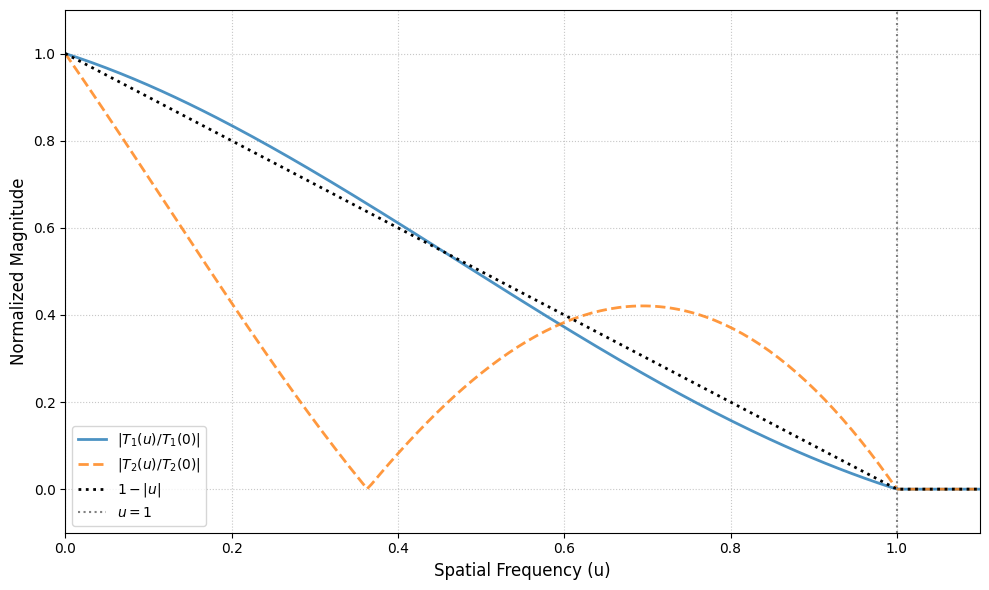

In [63]:
plot_transfer_functions(theta_deg=45, psi_deg=0, d=.5)
